# Classification Project: Telco Churn

## Goal:

- Discover the drivers causing customers to churn.
- Use drivers to develop a machine learning model to classify customers as likely or unlikely to churn.

## Package Imports <a class="anchor" id="packages_import"></a>


In [1]:
#Importing required packages and files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#These imports were constructed
from acquire import get_telco_data
from prepare import prep_telco, train_validate
import telco_functions as tf

#Removes warnings and imporves asthenics
import warnings
warnings.filterwarnings("ignore")


## Acquire<a class="anchor" id="data_import"></a>

- Data acquired from Codeup's SQL telco_churn database.
- The query resulted in 24 columns and 7043 rows before cleaning.
- Each row represents a record about a customer.
- Each column represents a feature associated with that customer.

## Prepare <a class="anchor" id="prepare"></a>

In [2]:
#Get, prepare and split data
df = prep_telco(get_telco_data())
train, validate, test = train_validate(df, 'churn')
churn_indicator, anti_churn = tf.ind_of_churn(train)

### Prepare Actions:
1. Checked for and replaced nulls with 0 in the total_charges column.
2. Changed column data types to a usable format.
3. Created 'tenure' column since the provided one seemed suspect.
4. Created dummy columns for categorical fields and encoded variables.
5. Dropped unused or redundant columns.
6. Split data into Train, Validate and Test sets (approx. 80/14/6), stratifying on 'churn'.

## Data Dictionary:


| Feature |	Definition |
|:--------|:-----------|
|phone_service| Indicates if a customer is subscribed for phone service |
|multiple_lines| If a customer subscribed for phone service has multiple lines.|
|online_security| If a customer is subscribed for online security service |
|online_backup|  If a customer is subscribed for online backup service |
|device_protection|  If a customer is subscribed for device protection service |
|tech_support|  If a customer is subscribed for technical support service |
|streaming_tv|  If a customer is subscribed for streaming TV service |
|streaming_movies|  If a customer is subscribed for streaming movie service |
|churn_month|  If a customer has churned, this is the month they cancelled their service |
|paperless_billing| Indicates 1 if the customer subscribe to paperless_billing. |
|gender| The customer's biological sex |
|senior_citizen| Indicates 1 if the customer is described as a senior citizen. Cutoff age is unknown. |
|partner| Indicates 1 if the customer has a spouse. |
|dependents| Indicates 1 if the customer is relied upon by another human for financial support. |
|monthly_charges| Total charges on a monthly basis for all the services a customer is subscribed to.|
|total_charges| This is a sum of all the monthly charges a customer has paid during their tenure.|
|signup_date| The date on which the customer first signed up for services. |
|contract_type| Month-to-month, yearly and two-year contracts|
|internet_service_type| None, DSL and fiber optic |
|payment_type| Mailed check, electronic check, bank transfer and credit card. |
|churn (target)| Indicates 1 if the customer has cancelled all their subscriptions with Telco. |
|tenure| The number of months that a customer has been subscribed for services. |

## Exploring the data

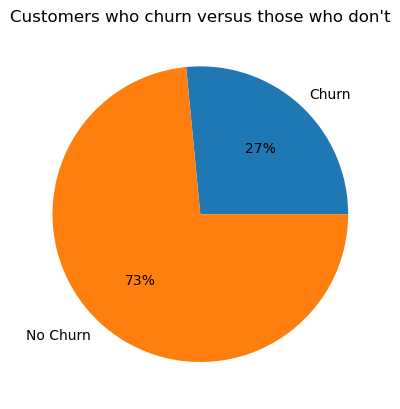

In [3]:
tf.get_pie(train)

### Looking at churn for monthly charges and tenure
- Continuous variables

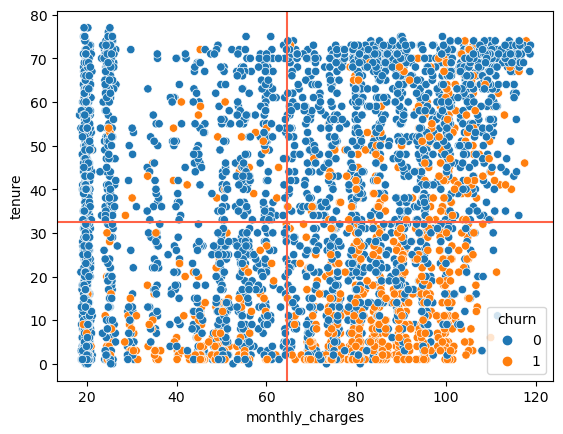

In [4]:
tf.charges_chart(train)

Takeaway: It appears that a low tenure and high monthly charge have a relationship with churn.

### Finding categorical features that occure more often in customers who churn:

In [5]:
churn_indicator

,Churn %,Not Churn %,Churn Indication %
Column,,,
contract_type_Month-to-month,89.5,42.4,47.1
tech_support_No,78.0,39.2,38.8
online_security_No,76.6,39.7,36.9
internet_service_type_Fiber optic,69.6,34.7,34.9


### Question 1 <a class="anchor" id="q_1"></a>

What is the relatiohship between having a contract type of Month-to-month and churn?

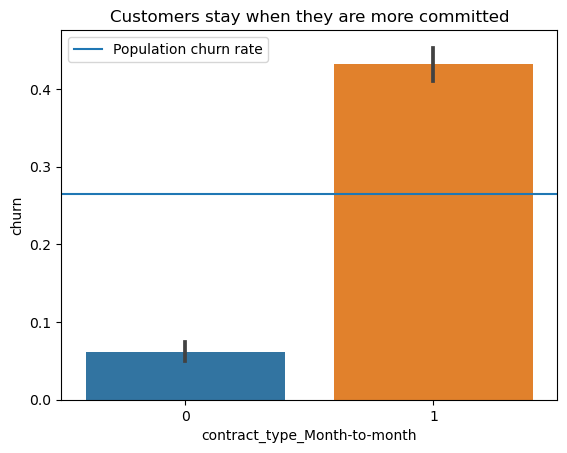

In [6]:
tf.q_1_viz(train)

#### H0 = Customers with Month-to-month contracts and that churn are independent.

#### HA = There is a relationship between customers with Month-to-month contracts and that churn.

$Chi^2$ test to investigate:
- Confidence interval of 95%
- Alpha is 0.05

In [7]:
tf.get_chi_m2m(train)

Reject the null hypothesis that customers with Month-to-month contracts and that churn are independent.

Sufficient evidence to move forward understanding that there is a relationship between customers with Month-to-month contracts and that churn.

The associated p-value is: 2.6129757677254923e-151


### Question 2 <a class="anchor" id="q_2"></a>

Is there a relationship between having fiber optic internet service type and churn?

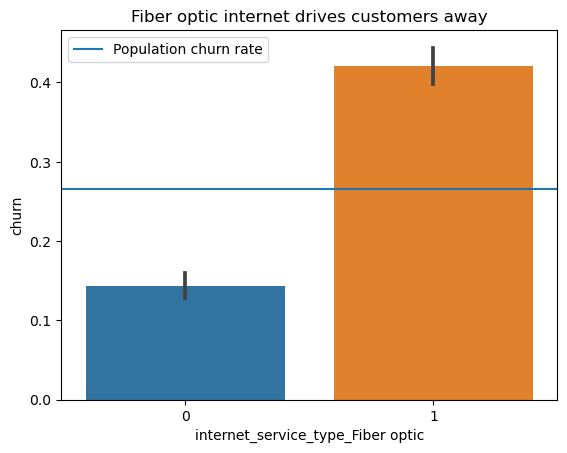

In [8]:
tf.q_2_viz(train)

#### H0 = Customers with fiber optic internet and that churn are independent.

#### HA = There is a relationship between customers with fiber optic internet and that churn.

$Chi^2$ test to investigate:
- Confidence interval of 95%
- Alpha is 0.05

In [9]:
tf.get_chi_fo(train)

Reject the null hypothesis that customers with fiber optic internet service and that churn are independent.

Sufficient evidence to move forward understanding that there is a relationship between customers with fiber optic internet service and that churn.

The associated p-value is: 1.5755854888703442e-84


### Question 3 <a class="anchor" id="q_3"></a>

Is there a relationship between not having tech support and churn?

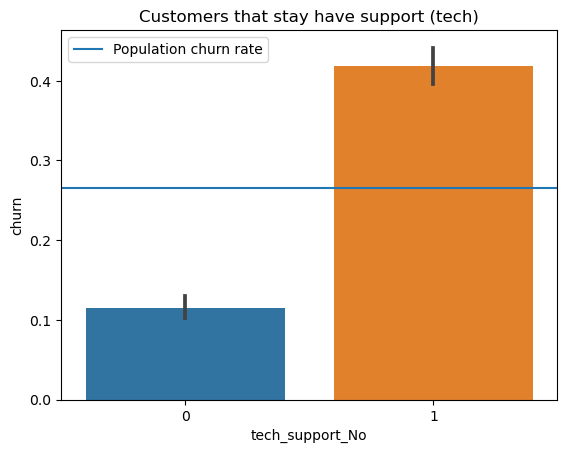

In [10]:
tf.q_3_viz(train)

#### H0 = Customers without tech support and that churn are independent.

#### HA = There is a relationship between customers without tech support and that churn.

$Chi^2$ test to investigate:
- Confidence interval of 95%
- Alpha is 0.05

In [11]:
tf.get_chi_ts(train)

Reject the null hypothesis that customers who don't have tech support and that churn are independent.

Sufficient evidence to move forward understanding that there is a relationship between customers that without tech support and that churn.

The associated p-value is: 2.581300101624473e-102


### Comparing means to identify features that occure more often in customers who do not churn:

In [12]:
anti_churn

,Churn %,Not Churn %,Churn Indication %
Column,,,
contract_type_Two year,2.6,31.9,-29.3
device_protection_No internet service,5.8,27.0,-21.2
online_security_No internet service,5.8,27.0,-21.2
online_backup_No internet service,5.8,27.0,-21.2


### Question 4 <a class="anchor" id="q_4"></a>

Is there a relationship between having no internet service and churn?

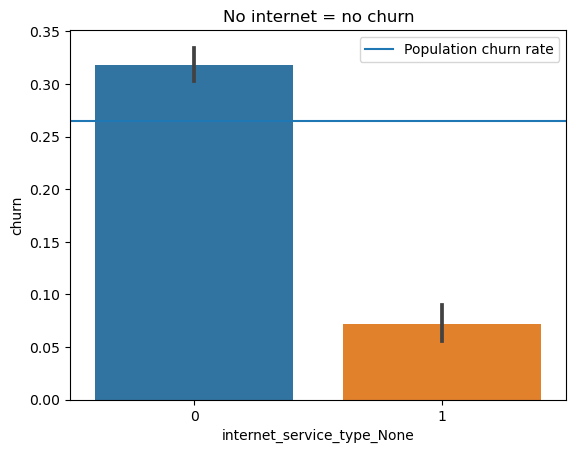

In [13]:
tf.q_4_viz(train)

#### H0 = Customers without internet and that churn are independent.

#### HA = There is a relationship between customers without internet and that churn.

$Chi^2$ test to investigate:
- Confidence interval of 95%
- Alpha is 0.05

In [14]:
tf.get_chi_ni(train)

Reject the null hypothesis that customers with no internet service and that churn are independent

Sufficient evidence to move forward understanding that there is a relationship between customers with no internet service and that churn

The associated p-value is: 2.8258083144357664e-46


## Explore summary <a class="anchor" id="explore2"></a>

We found four categorical features which were shown to have a relationship with customer churn. Those are:
1. contract_type_Month-to-month
2. internet_service_type_Fiber optic
3. tech_support_No
4. internet_service_type_None

## Modeling <a class="anchor" id="modeling"></a>

In [15]:
#Seperating out the target variable for modeling
X_train, y_train, X_val, y_val, X_test, y_test = tf.train_val_test(train, validate, test)

- Accuracy will be our evaluation metric.
- Baseline is churn = 0, which makes up 73% of our data.

### Decision Tree

In [16]:
tf.dec_tree(X_train, y_train, X_val, y_val)

Accuracy of Decision Tree classifier on training set:   0.7933
Accuracy of Decision Tree classifier on validation set: 0.7830


### Random Forest

In [17]:
tf.rand_forest(X_train, y_train, X_val, y_val)

Accuracy of Random Forest classifier on training set:   0.7915
Accuracy of Random Forest classifier on validation set: 0.7853


### KNN

In [18]:
tf.knn_mod(X_train, y_train, X_val, y_val)

Accuracy of KNN classifier on training set:   0.8098
Accuracy of KNN classifier on validation set: 0.7806


### Logistic Regression

In [19]:
tf.lr_mod(X_train, y_train, X_val, y_val)

Accuracy of Logistic Regression classifier on training set:   0.8055
Accuracy of Logistic Regression classifier on validation set: 0.7995


### Modeling Summary

- Every model performed better than the baseline
- The KNN model performed slightly better on train data but was worse on the validation set. It is likely overfit.
- Logistic Regression has the closest Accuracy on the training and validation set. That will be the final model to use.

### Final Test

In [20]:
tf.final_test(X_train, y_train, X_test, y_test)

Accuracy of Logistic Regression classifier on test set: 0.8041


## Conclusion <a class="anchor" id="conclusion"></a>

The best performing model was the Logistic Regression classifier
- Training set accuracy: 0.8055
- Validation set accuracy: 0.7995
- Test set accuracy: 0.8041

### Summery <a class="anchor" id="c_summery"></a>

Churn occurs at 26.5% in the Telco dataset. The drivers of churn are: 
- Having a month-to-month contract
- Not having tech support
- Not having online security
- Having fiber optic internet 
- Low tenure/being a new customer
- Higher monthly charges

### Recommendations <a class="anchor" id="c_recs"></a>

- Evaluate pricing and quality of fiber optic internet service.
- Evaluate pricing and impact of tech support and online security.
- Incentivize Month-to-month and fiber optic customers to stay.
- Consider lowering prices for newer customers.
- Once churn decreases, evaluate pricing power on phone services and two year contracts.

### Next Steps <a class="anchor" id="c_steps"></a>

- Do statistical testing on the monthly_charges and total_charges features
- Create a way to automatically compare churn for continuous features
- Dig in deeper on features which have greater than 10% indication of churn.
- Evaluate fiber optic internet type to identify focus areas.